In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# read dataframe
nb_seeds = 2
results_dir = "/storage/store2/work/aheurteb/mvicad/tbme/data/"
save_name = f"DataFrame_with_{nb_seeds}_seeds_wrt_different_filters_combinations"
save_path = results_dir + save_name
df = pd.read_csv(save_path)

In [32]:
df

,Amari LBFGSB,Dilations error LBFGSB,Shifts error LBFGSB,Time LBFGSB,Amari MVICAD,Time MVICAD,Amari MVICAD ext,Time MVICAD ext,Amari permica,random state,filter_length_squarenorm_f,use_envelop_term,number_of_filters_envelop,filter_length_envelop
0,0.000089,0.008885,0.009041,40.550057,0.010534,0.326134,0.001591,0.526739,0.031155,1,1,True,1,2
1,0.000089,0.008885,0.009041,39.024885,0.010534,0.300076,0.001591,0.515843,0.031155,1,1,True,1,2
2,0.000079,0.011235,0.010467,38.679967,0.010534,0.301309,0.001591,0.519074,0.031155,1,1,True,1,3
3,0.000079,0.011235,0.010467,38.399546,0.010534,0.300642,0.001591,0.512854,0.031155,1,1,True,1,3
4,0.000090,0.011795,0.018837,39.889750,0.010534,0.309085,0.001591,0.509166,0.031155,1,1,True,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.000126,0.015113,0.007195,50.083563,0.010534,0.337139,0.001591,0.612781,0.031155,1,7,False,0,0
220,0.000121,0.018269,0.013185,49.291776,0.010534,0.344468,0.001591,0.590693,0.031155,1,10,False,0,0
221,0.000121,0.018269,0.013185,48.634092,0.010534,0.343140,0.001591,0.652737,0.031155,1,10,False,0,0
222,0.000137,0.021009,0.015965,54.024992,0.010534,0.590862,0.001591,0.873718,0.031155,1,15,False,0,0


In [33]:
# average among random states
nb_random_states = len(np.unique(df["random_state"]))
nb_random_states += 1  # XXX
nb_random_states

2

In [34]:
# check if DataFrame can be evenly divided into batches of size nb_random_states
if len(df) % nb_random_states != 0:
    raise ValueError("The number of rows in the DataFrame should be a multiple of the \
        number of random states.")

# split the DataFrame into batches and compute the median for each batch
batches = [df[i:i + nb_random_states] for i in range(0, len(df), nb_random_states)]
batch_means = [batch.median() for batch in batches]

# combine the results into a single DataFrame
df_median = pd.DataFrame(batch_means).reset_index(drop=True)

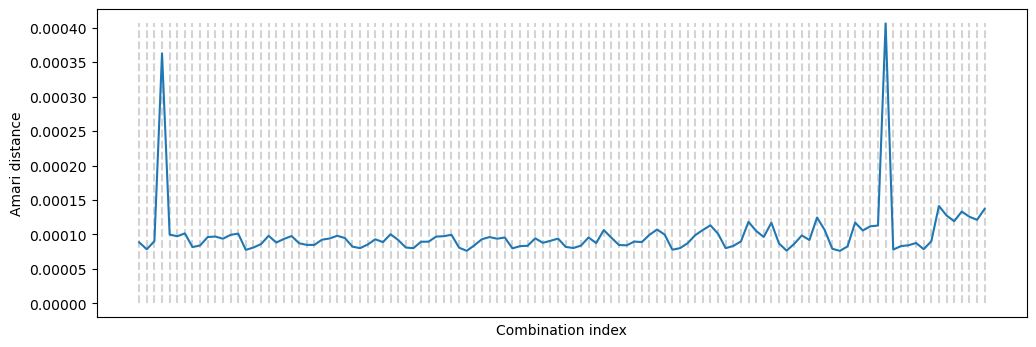

In [35]:
# plot
plt.figure(figsize=(12, 4))
plt.plot(np.arange(len(df_median)), df_median["Amari LBFGSB"])
for i in range(len(df_median)):
    plt.vlines(x=i, ymin=0, ymax=np.max(df_median["Amari LBFGSB"]), linestyles="--", colors="lightgrey")
plt.xticks([])
plt.xlabel("Combination index")
plt.ylabel("Amari distance")
plt.show()

In [36]:
sorted_indices = np.argsort(df_median["Amari LBFGSB"].values)[::-1]
worst_combs = sorted_indices[:2]
print(f"Worst combinations indexes: {worst_combs}")

Worst combinations indexes: [98  3]


In [37]:
for i, comb in enumerate(worst_combs):
    print(f"############################ Worst combination {i} ############################")
    print(df.iloc[comb*nb_random_states])

############################ Worst combination 0 ############################
Amari LBFGSB                   0.000406
Dilations error LBFGSB         0.032717
Shifts error LBFGSB            0.043564
Time LBFGSB                   47.585001
Amari MVICAD                   0.010534
Time MVICAD                    0.356571
Amari MVICAD ext               0.001591
Time MVICAD ext                0.569067
Amari permica                  0.031155
random state                          1
filter_length_squarenorm_f            1
use_envelop_term                   True
number_of_filters_envelop             1
filter_length_envelop                 1
Name: 196, dtype: object
############################ Worst combination 1 ############################
Amari LBFGSB                   0.000363
Dilations error LBFGSB         0.032371
Shifts error LBFGSB            0.038284
Time LBFGSB                   40.840365
Amari MVICAD                   0.010534
Time MVICAD                    0.330118
Amari MVICAD ext   

Potential conclusion: not using a smoothing filter in the square norm term is bad. However, it is strange that peaks only appear for filter_length_envelop = 1 and 10; I should wait for data with more seeds.